### Pandas case study 1- Time Series Analysis

---

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

In [ ]:
# till now
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

---

#### Timedelta Object

Represents a duration, the difference between two dates or times.

In [2]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [3]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [4]:
# Arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [5]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

---

#### Import data

In [6]:
# real life example
dir = r"C:\Users\SESA702302\OneDrive - Schneider Electric\Personal\0.0 Data Science Personal\8.0 Week 8 - Advanced Pandas - 2\4.0 Pandas case study 1- Time Series Analysis"
df = pd.read_csv(dir+'\\deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [10]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']

df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

---

#### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [13]:
subs = pd.read_excel(dir+'\\time_series.xlsx', sheet_name='subscribers')
views = pd.read_excel(dir+'\\time_series.xlsx', sheet_name='views')
wt = pd.read_excel(dir+'\\time_series.xlsx', sheet_name='watch-time')
comments = pd.read_excel(dir+'\\time_series.xlsx', sheet_name='comments')
google = pd.read_csv(dir+'\\google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [14]:
comments.tail()

,Date,Comments added
1638,2024-06-26,122
1639,2024-06-27,97
1640,2024-06-28,123
1641,2024-06-29,104
1642,2024-06-30,47


#### Merging all the youtube data

In [15]:
yt = subs.merge(views,on='Date').merge(wt,on='Date').merge(comments,on='Date')

In [16]:
yt.head()

,Date,Subscribers,Views,Watch time (Hours),Comments added
0,2020-01-01,72,57661,86,37
1,2020-01-02,43,5253,101,88
2,2020-01-03,504,5672,144,38
3,2020-01-04,839,50070,128,79
4,2020-01-05,64,66438,75,144


#### Converting date column to date time

In [17]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Date'] = pd.to_datetime(yt['Date'])

In [18]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 0 to 1642
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1643 non-null   datetime64[ns]
 1   Subscribers         1643 non-null   int64         
 2   Views               1643 non-null   int64         
 3   Watch time (Hours)  1643 non-null   int64         
 4   Comments added      1643 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 77.0 KB


In [19]:
google.set_index('Date',inplace=True)
yt.set_index('Date',inplace=True)

In [20]:
yt.head()

,Subscribers,Views,Watch time (Hours),Comments added
Date,,,,
2020-01-01,72,57661,86,37
2020-01-02,43,5253,101,88
2020-01-03,504,5672,144,38
2020-01-04,839,50070,128,79
2020-01-05,64,66438,75,144


#### Analysis

In [21]:
# fetch a specific date
google.loc['2021-12-30']

Open           2929.000000
High           2941.250000
Low            2915.169922
Close          2920.050049
Adj Close      2920.050049
Volume       648900.000000
Name: 2021-12-30 00:00:00, dtype: float64

In [22]:
# partial indexing -> select a particular year/month
yt.loc['2022-12']
yt.loc['2022']

,Subscribers,Views,Watch time (Hours),Comments added
Date,,,,
2022-01-01,620,80825,69,135
2022-01-02,218,51577,144,165
2022-01-03,701,7148,63,192
2022-01-04,708,53249,12,137
2022-01-05,659,47780,72,101
...,...,...,...,...
2022-12-27,485,35430,36,145
2022-12-28,967,62819,3,68
2022-12-29,900,22098,4,157


In [23]:
# create year month-name and day-name
yt['month_name'] = yt.index.month_name()
yt['weekday_name'] = yt.index.day_name()
yt['quarter'] = yt.index.quarter

In [24]:
yt.head()

,Subscribers,Views,Watch time (Hours),Comments added,month_name,weekday_name,quarter
Date,,,,,,,
2020-01-01,72,57661,86,37,January,Wednesday,1
2020-01-02,43,5253,101,88,January,Thursday,1
2020-01-03,504,5672,144,38,January,Friday,1
2020-01-04,839,50070,128,79,January,Saturday,1
2020-01-05,64,66438,75,144,January,Sunday,1


In [25]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [26]:
# slicing
yt.loc['2022-12-15':'2023-1-1':2]

,Subscribers,Views,Watch time (Hours),Comments added,month_name,weekday_name,quarter
Date,,,,,,,
2022-12-15,404,61560,73,72,December,Thursday,4
2022-12-17,44,94884,27,128,December,Saturday,4
2022-12-19,878,29189,88,189,December,Monday,4
2022-12-21,404,69752,28,146,December,Wednesday,4
2022-12-23,793,33721,123,169,December,Friday,4
2022-12-25,8,74088,72,62,December,Sunday,4
2022-12-27,485,35430,36,145,December,Tuesday,4
2022-12-29,900,22098,4,157,December,Thursday,4
2022-12-31,720,25427,129,57,December,Saturday,4


In [27]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
google.head()


google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

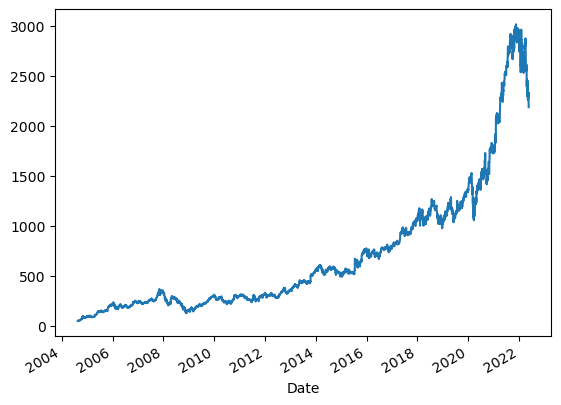

In [28]:
# viz a single col
google['Close'].plot()

<Axes: xlabel='Date'>

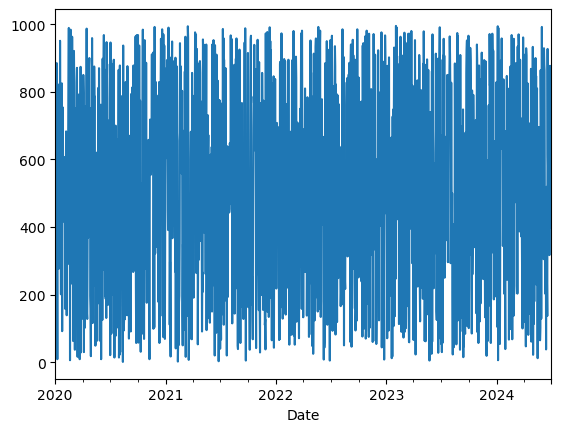

In [29]:
yt['Subscribers'].plot()

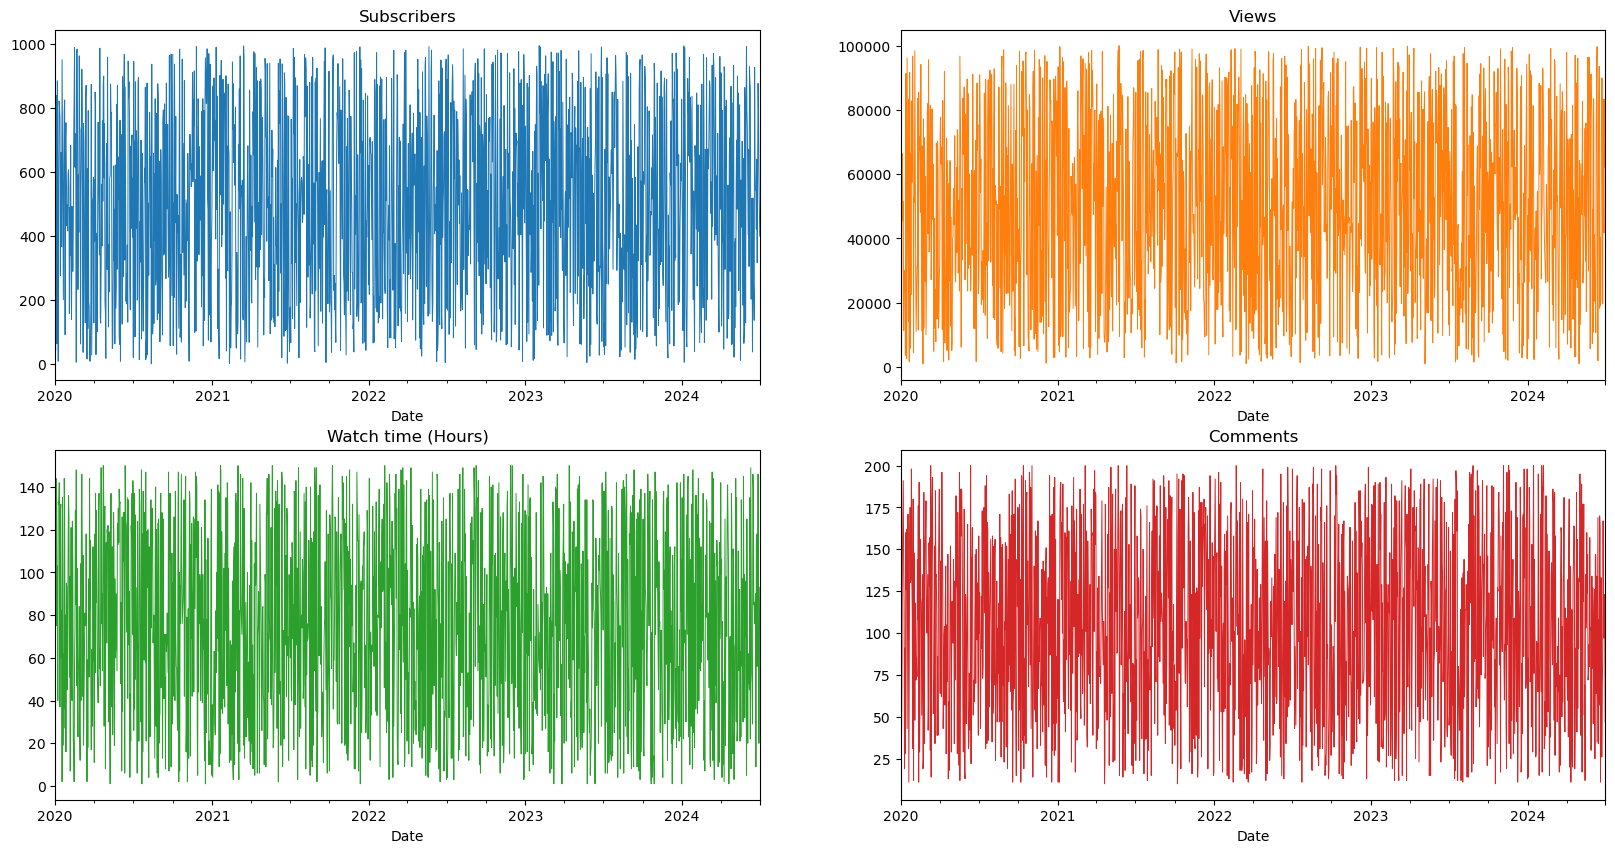

In [32]:
# viz all cols together
subset_yt = yt[['Subscribers', 'Views', 'Watch time (Hours)', 'Comments added']]
ax = subset_yt.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Subscribers', 'Views', 'Watch time (Hours)', 'Comments'])

<Axes: xlabel='Date'>

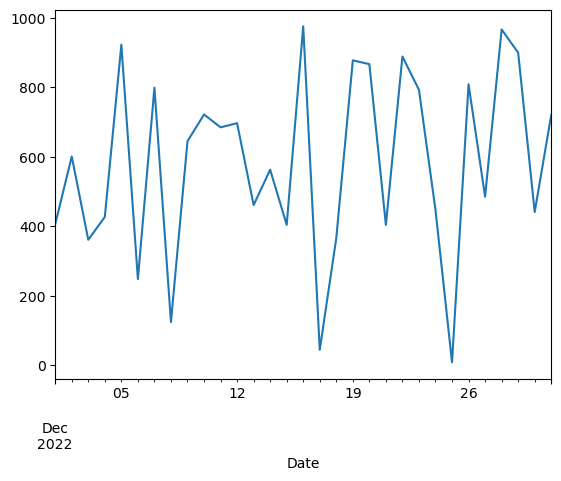

In [33]:
# plot for a particular year/month/week
yt.loc['2022-12']['Subscribers'].plot()

<Axes: xlabel='Date'>

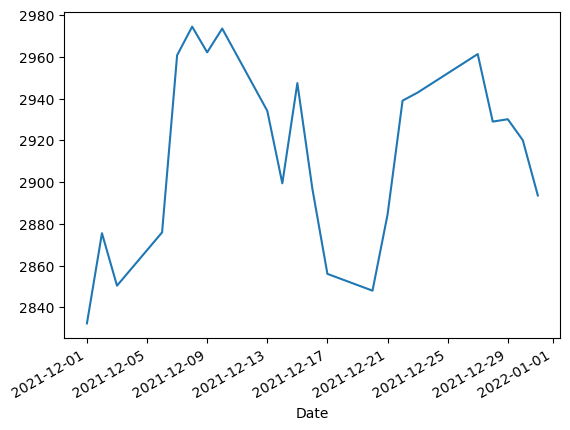

In [34]:
google.loc['2021-12']['Close'].plot()

<Axes: xlabel='month_name'>

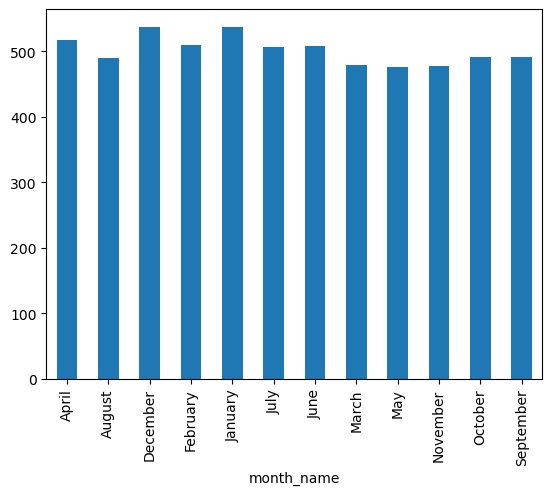

In [35]:
# monthly trend
yt.groupby('month_name')['Subscribers'].mean().plot(kind='bar')

<Axes: xlabel='weekday_name'>

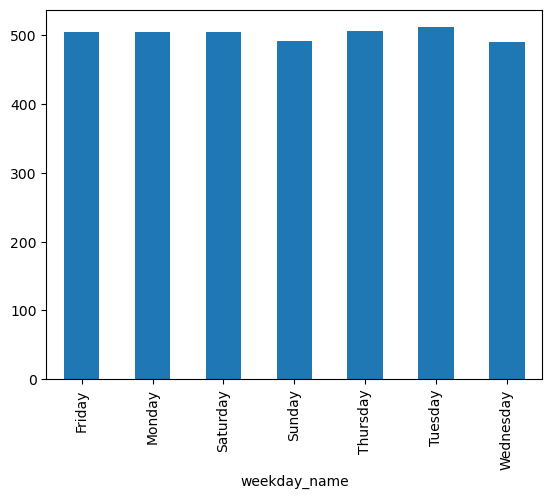

In [36]:
# yearly trend
yt.groupby('weekday_name')['Subscribers'].mean().plot(kind='bar')

<Axes: xlabel='month_name'>

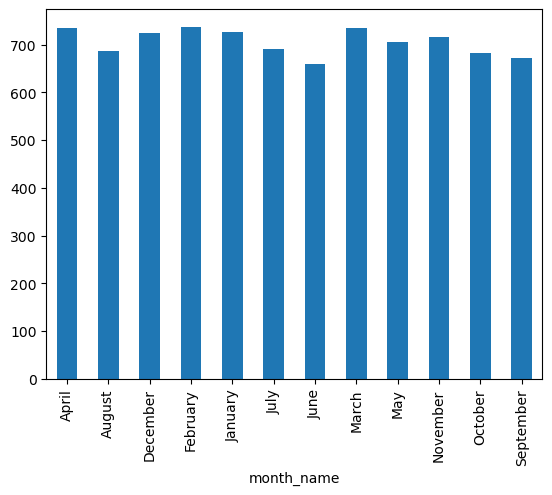

In [37]:
google.groupby('month_name')['Close'].mean().plot(kind='bar')

<Axes: xlabel='quarter'>

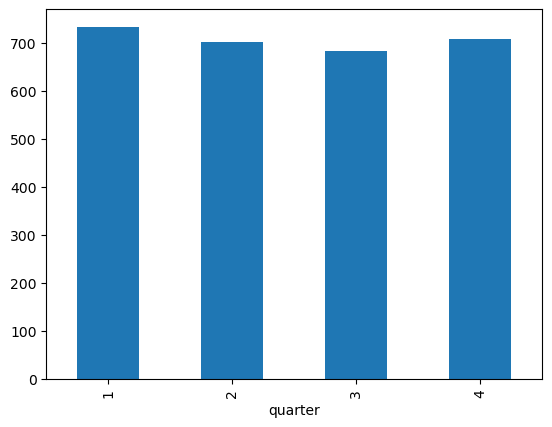

In [38]:
# quaterly trend
google.groupby('quarter')['Close'].mean().plot(kind='bar')

In [39]:
# frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [40]:
# asfreq
google.asfreq('6H',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2


---

#### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<Axes: xlabel='Date'>

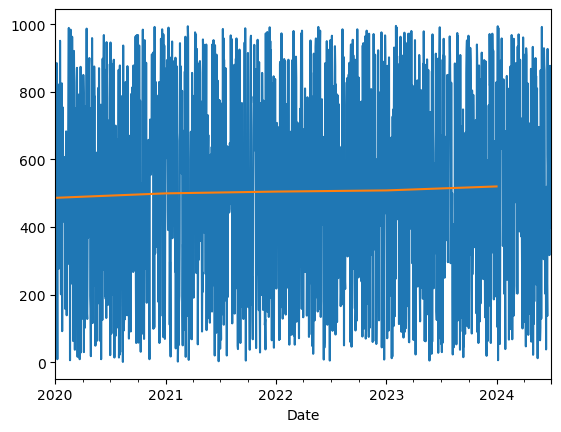

In [41]:
# Downsampling
yt['Subscribers'].plot()
yt['Subscribers'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

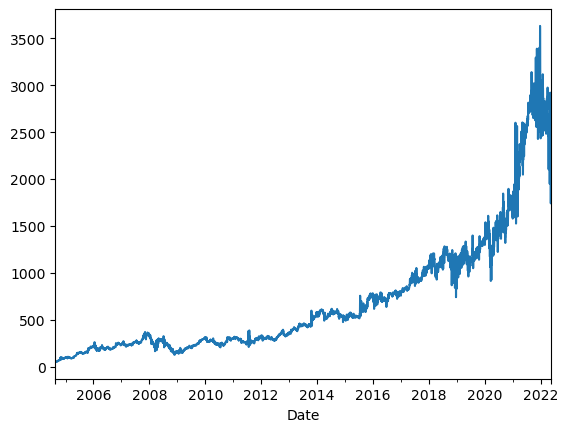

In [42]:
# Upsampling
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

---

#### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

<Axes: title={'center': 'ewm'}, xlabel='Date'>

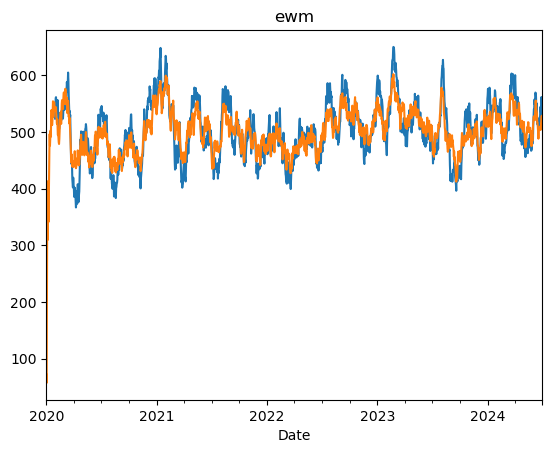

In [43]:
# Rolling window
yt['Subscribers'].rolling(30).mean().plot(title='rolling')
yt['Subscribers'].ewm(30).mean().plot(title='ewm')

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [44]:
# shift
yt['Subscribers']

Date
2020-01-01     72
2020-01-02     43
2020-01-03    504
2020-01-04    839
2020-01-05     64
             ... 
2024-06-26    877
2024-06-27    790
2024-06-28    582
2024-06-29    485
2024-06-30    400
Name: Subscribers, Length: 1643, dtype: int64

In [45]:
yt['Subscribers'].shift(-1)

Date
2020-01-01     43.0
2020-01-02    504.0
2020-01-03    839.0
2020-01-04     64.0
2020-01-05    885.0
              ...  
2024-06-26    790.0
2024-06-27    582.0
2024-06-28    485.0
2024-06-29    400.0
2024-06-30      NaN
Name: Subscribers, Length: 1643, dtype: float64

In [46]:
# shift example
df = pd.read_csv(dir+'\\login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [47]:
user_df = df[df['user_id'] == 458]
user_df.head()

,user_id,login_time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


In [48]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     208 non-null    int64         
 1   login_time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


C:\Users\SESA702302\AppData\Local\Temp\ipykernel_28144\897488481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [49]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

C:\Users\SESA702302\AppData\Local\Temp\ipykernel_28144\4028882259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('0 days 17:29:22.053140096')

ValueError: The length of `title` must equal the number of columns if using `title` of type `list` and `subplots=True`.
length of title = 6
number of columns = 7

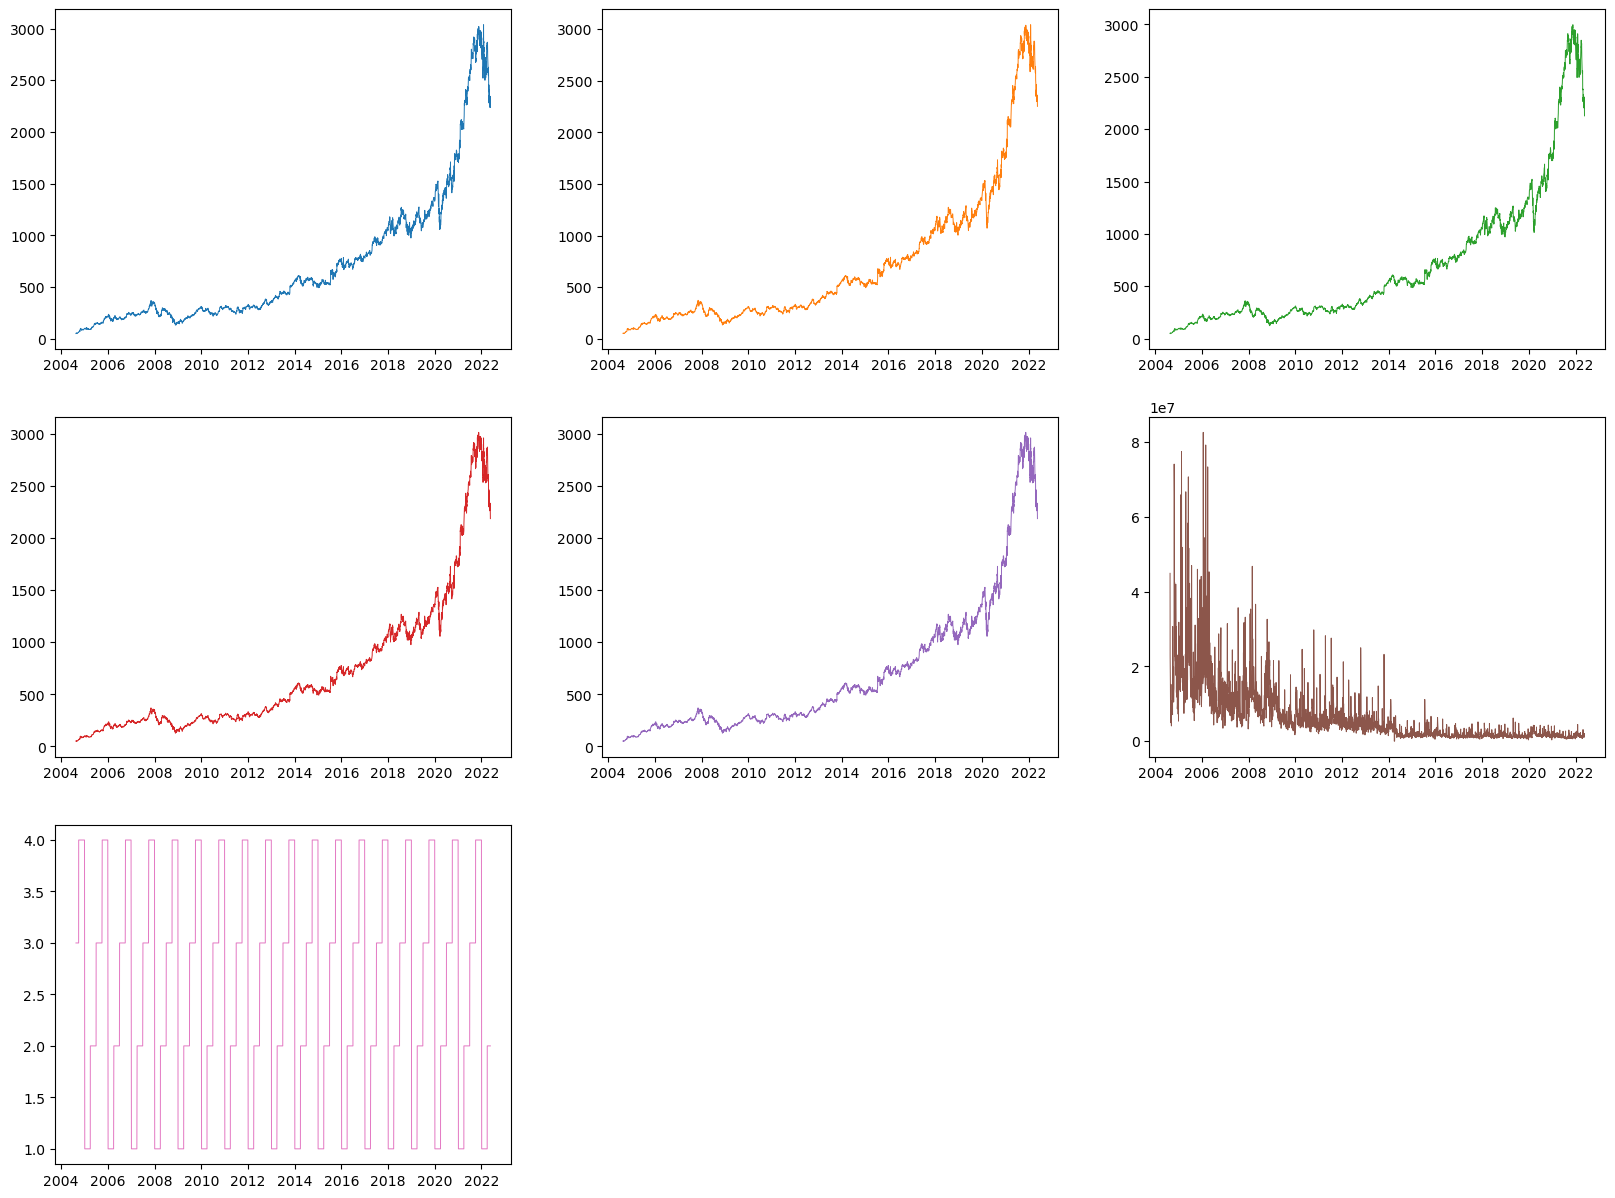

In [56]:
ax = google.plot(subplots=True,
                    layout=(3, 3),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,15),
                      title=['Open', 'High', 'Low', 'Close','Adj Close', 'Volume'])